<a href="https://colab.research.google.com/github/nadya1462/sirius_2022/blob/main/ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Import packages

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.datasets import mnist      
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

###MNIST loading and standartization 

MNIST info:
*   70k pictures of 28*28 pixels (60k - for training, 10k - for testing)
*   grayscale: 0 - black, 255 - white

In [145]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

x_train = x_train / 255
x_test = x_test / 255

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

###Creating the model

In [146]:
model = keras.Sequential([Flatten(input_shape = (28, 28, 1)), # 1st layer
                          Dense(120, activation = 'relu'), # hidden layer
                          Dense(10, activation = 'softmax')]) # output layer 

print(model.summary())  

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_24 (Dense)            (None, 120)               94200     
                                                                 
 dense_25 (Dense)            (None, 10)                1210      
                                                                 
Total params: 95,410
Trainable params: 95,410
Non-trainable params: 0
_________________________________________________________________
None


###Network compilation

In [147]:
model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

###Training

In [148]:
history = model.fit(x_train, y_train_cat, batch_size = 32, epochs = 5, validation_split = 0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.7151 - accuracy: 0.8256 - val_loss: 0.3763 - val_accuracy: 0.8972
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3594 - accuracy: 0.9009 - val_loss: 0.3081 - val_accuracy: 0.9158
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3074 - accuracy: 0.9129 - val_loss: 0.2741 - val_accuracy: 0.9244
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2763 - accuracy: 0.9223 - val_loss: 0.2517 - val_accuracy: 0.9293
Epoch 5/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9283 - val_loss: 0.2345 - val_accuracy: 0.9348


Text(0, 0.5, 'Loss function')

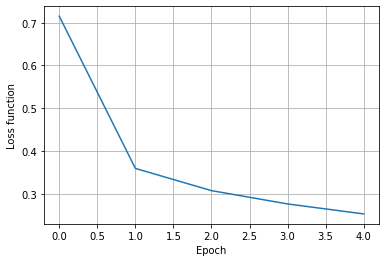

In [149]:
plt.plot(history.history['loss'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Loss function')

Text(0, 0.5, 'Accuracy')

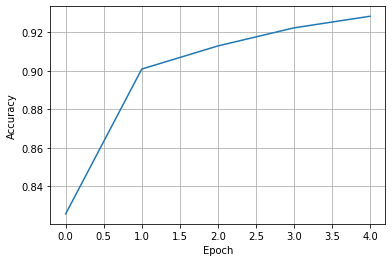

In [150]:
plt.plot(history.history['accuracy'])
plt.grid()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

###Testing

In [151]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.2326 - accuracy: 0.9351


[0.23262594640254974, 0.9351000189781189]

In [152]:
pred_cat = model.predict(x_test)
pred = np.argmax(pred_cat, 1)

###Confusion matrix

In [153]:
cf_matrix = confusion_matrix(y_test, pred)
print(cf_matrix)

[[ 959    0    3    2    0    3   10    1    2    0]
 [   0 1111    2    2    1    2    4    2   11    0]
 [   8    5  949   14    9    1   12    9   22    3]
 [   2    0   18  933    0   17    3   10   19    8]
 [   1    3    4    1  926    0   11    2    7   27]
 [   8    2    8   27    2  794   17    4   24    6]
 [   9    3    4    1   10    7  919    1    4    0]
 [   2   10   28    7    6    0    0  942    2   31]
 [   6    6    5   20    7   14   13    6  892    5]
 [  10    7    1   14   31    6    1    9    4  926]]


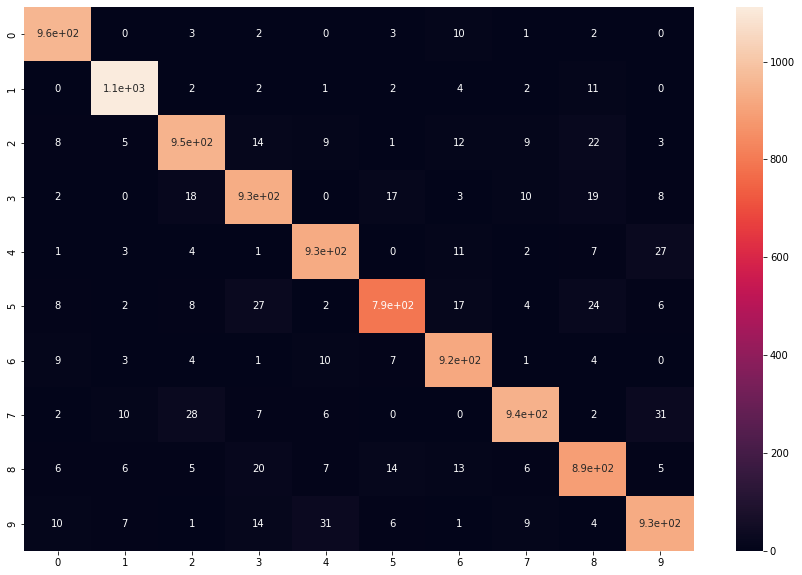

In [154]:
plt.figure(figsize = (15,10))
sns.heatmap(cf_matrix, annot=True)